In [1]:
%load_ext jupyter_black

# Decision Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from IPython.display import display

%matplotlib inline

In [4]:
toy_data = pd.read_csv("data\\tennis.csv.txt")
toy_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### A decision tree for data above

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 2. Decision Tree Algorithms

| Feature                | ID.3 (Ross Quinlan et al.)    | CART (Leo Breiman et al.)     | C4.5, C5 (Ross Quinlan et al.) |
|------------------------|-------------------------------|-------------------------------|-------------------------------|
| **Splitting Criterion**| Information Gain              | Gini (classification) / Variance (regression) | Gain Ratio                   |
| **Data Types**         | Categorical only              | Categorical + Continuous      | Categorical + Continuous      |
| **Tree Structure**     | Multi-way                     | Binary                        | Multi-way for categorical features, binary for numerical           |
| **Pruning**            | None                          | Cost-complexity               | Pessimistic pruning           |
| **Task Support**       | Classification                | Classification + Regression   | Classification                |
| **Overfitting**        | High (no pruning)             | Moderate (pruning, binary splits) | Low (pruning, gain ratio) |
| **Missing Values**     | Not handled                   | Surrogate splits              | Fractional instances          |

**scikit-learn decision trees are based on CART**

## Splitting Criterions a.k.a Impurity measures

In the decision tree, each node corresponds to a subset of the train data $S$. Let $\{p_i\}_{i=1}^C$ be the target distribution over $C$ classes for this subset $S$.

* __Entropy:__ $H(S) = -\sum p_i\log(p_i)$
* __Gini Index:__ $Gini(S) = 1-\sum p_i^2$

> NOTE: the perfomance is usually similar, it doesn't matter which one to chose

These are an **Impurity measures** of single node, now we want to select an optimal split. For candidate $S=S_1 \sqcup S_2 \dots \sqcup S_{K_A}$ respecting the values of feature $A$

* __Information gain__, aka mutual information $$IG(S, A) = H(S) - H(S|A) = I(S;A) = \sum_{i=1}^{K_A}\frac{|S_i|}{|S|}H(S_i)$$
> NOTE: What are the limits of IG values? Can it be nega
* __Gain Ratio__: $$GainRatio(S, A) = IG(S, A) \cdot \frac{1}{-\sum_{i=1}^{K_A} \frac{|S_i|}{|S|}\log\frac{|S_i|}{|S|}}$$


# Manual Construction for the toy data

### Entropy of play

In [5]:
toy_data.play.value_counts()

play
yes    9
no     5
Name: count, dtype: int64

In [9]:
Entropy_Play = -9 / 14 * np.log(9 / 14) - 5 / 14 * np.log(5 / 14)
Entropy_Play

np.float64(0.6517565611726531)

#### Information Gain on splitting by Outlook


In [10]:
toy_data[toy_data.outlook == "sunny"]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [11]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny = -2 / 5 * np.log(2 / 5) - 3 / 5 * np.log(3 / 5)

In [12]:
Entropy_Play_Outlook_Sunny

np.float64(0.6730116670092565)

In [13]:
toy_data[toy_data.outlook == "overcast"]

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [ ]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [14]:
toy_data[toy_data.outlook == "rainy"]

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [15]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -2 / 5 * np.log(2 / 5) - 3 / 5 * np.log(3 / 5)

In [16]:
Entropy_Play_Outlook_Rain

np.float64(0.6730116670092565)

#### Gain on splitting by attribute outlook

In [19]:
Information_Gain = (
    Entropy_Play
    - 5 / 14 * Entropy_Play_Outlook_Sunny
    - 5 / 14 * Entropy_Play_Outlook_Rain
)
Information_Gain

np.float64(0.17103394188032706)

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria

In [20]:
toy_data[toy_data.outlook == "overcast"]

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [21]:
toy_data[toy_data.outlook == "sunny"]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [22]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny = ...
Entropy_Play_Outlook_Sunny

Ellipsis

### Information Gain for humidity

In [ ]:
...

### Information Gain for windy

In [ ]:
Entropy_Windy_False = ...
Entropy_Windy_True = ...
IG_Windy= ...

### Information Gain for temperature

In [ ]:
...

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

# (repeat)

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

## Sklearn
[The guide on decision trees is awesome](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier
from sklearn.datasets import make_blobs

In [24]:
iris = load_iris()

In [25]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [26]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [27]:
dt = DecisionTreeClassifier(criterion="entropy")

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
trainX, testX, trainY, testY = train_test_split(iris.data, iris.target)

In [30]:
dt.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy')

In [31]:
export_graphviz(dt, "dt.tree")

### Visualizing the tree
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

In [32]:
dt.predict(testX)

array([0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0])

> NOTE:
> * CART (which is used inside sklearn DecisionTreeClassifier) will convert features with continues values into categorical values
> * Different tree will be generated with same faeatures given in different order. This is because `max_features` algorithm and random feature subsampling inside.

#### Feature Importances
* Important features will be higher up the tree
> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.



In [33]:
dt.feature_importances_

array([0.        , 0.01558797, 0.09360643, 0.8908056 ])

#### Visualizing Decision Boundry

In [ ]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X,Y)

In [ ]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [ ]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
xx.shape

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt8.PNG?raw=true">

# ID3 Implementation

For now, we will focus on the ID3 algorithm. 

In [1]:
import numpy as np
import pandas as pd

# Load dataset and convert to DataFrame
dataset = {
    'Taste': ['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
    'Temperature': ['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
    'Texture': ['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
    'Eat': ['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']
}
dataframe = pd.DataFrame(dataset, columns=['Taste','Temperature','Texture','Eat'])

# Prepare features and target
feature_names = dataframe.columns[:-1].tolist()
X = dataframe[feature_names].to_numpy()
y = dataframe['Eat'].to_numpy()
features = list(range(len(feature_names)))

dataframe.head(2)

,Taste,Temperature,Texture,Eat
0,Salty,Hot,Soft,No
1,Spicy,Hot,Soft,No


In [2]:
from typing import Dict, Any
from IPython.display import display
from graphviz import Digraph


def entropy(y: np.ndarray) -> float:
    """Calculate the entropy of a target array."""
    _, counts = np.unique(y, return_counts=True)
    probs = counts / y.shape[0]
    return -np.sum(probs * np.log(probs + 1e-10))


def information_gain(X: np.ndarray, y: np.ndarray, feature_idx: int) -> float:
    """Calculate the information gain for a given feature."""
    parent_entropy = entropy(y)

    values, counts = np.unique(X[:, feature_idx], return_counts=True)
    probs = counts / y.shape[0]
    entropies = np.array(
        list(map(lambda x: entropy(y[X[:, feature_idx] == x]), values))
    )
    conditional_entropy = np.sum(probs * entropies)

    return parent_entropy - conditional_entropy


def select_best_feature(X: np.ndarray, y: np.ndarray, features: list) -> list:
    """Select the feature with the highest information gain."""
    best_idx = np.argmax([information_gain(X, y, i) for i in range(X.shape[1])])
    return [best_idx, features[best_idx]]


def id3_algorithm(X: np.ndarray, y: np.ndarray, features: list) -> Dict[str, Any]:
    """Recursively build the ID3 decision tree."""
    classes, counts = np.unique(y, return_counts=True)

    majority_class = classes[np.argmax(counts)]

    # Base case: all samples same class
    if len(classes) == 1 or not features:
        return {"class": classes[0], "majority_class": classes[0]}

    best_id, best_feature = select_best_feature(X, y, features)
    feature_values = np.unique(X[:, best_id])
    new_features = features.copy()
    new_features.remove(best_feature)

    tree = {"feature": best_feature, "majority_class": majority_class, "children": {}}

    for value in feature_values:
        mask = X[:, best_id] == value
        X_sub, y_sub = np.delete(X, best_id, axis=1)[mask], y[mask]
        if len(y_sub) == 0:
            tree["children"][value] = {
                "class": majority_class,
                "majority_class": majority_class,
            }
        else:
            tree["children"][value] = id3_algorithm(X_sub, y_sub, new_features)

    return tree


def visualize_tree(
    tree: Dict[str, Any],
    feature_names: list,
    dot: Digraph = None,
    parent: str = None,
    edge_label: str = None,
) -> Digraph:
    """Recursively visualize the decision tree using Graphviz."""
    if dot is None:
        dot = Digraph(comment="Decision Tree")

    # Create a unique node ID
    node_id = str(id(tree))

    # Add the current node
    if "class" in tree:
        node_label = f"Class: {tree['class']}"
    else:
        node_label = f"Feature: {tree['feature']}"
    dot.node(node_id, node_label)

    # Connect to parent node if exists
    if parent is not None:
        dot.edge(parent, node_id, label=edge_label)

    # Recursively add children
    if "children" in tree:
        for value, child in tree["children"].items():
            visualize_tree(child, feature_names, dot, node_id, str(value))

    return dot


class DecisionTree:
    """
    Decision tree classifier, which can be trained, can predict class labels(miraculously) and display itself if used in a frontend environment.
    """

    def __init__(self):
        self._features = []
        self._tree = {}

    def fit(self, X: np.ndarray, y: np.ndarray, features: list) -> None:
        """Fit the decision tree to passed data."""
        self._features = features
        self._tree = id3_algorithm(X, y, features)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels for given data."""
        ans = np.zeros((X.shape[0], 1), dtype="object")
        for i in range(ans.shape[0]):
            node = self._tree
            while "class" not in node:
                feature_id = self._features.index(node["feature"])
                if X[i, feature_id] in node["children"]:
                    node = node["children"][X[i, feature_id]]
                else
            ans[i, 0] = node["class"]
        return ans

    def show_tree(self):
        """Visualize the decision tree."""
        dot = visualize_tree(self._tree, self._features)
        display(dot)

In [7]:
classifier = DecisionTree()
classifier.fit(X, y, feature_names.copy())

# New data point for prediction
new_data_point = np.array([["Salty", "Hot", "Hard"]], dtype="object")
prediction = classifier.predict(new_data_point)

print(f"Prediction for the new data point: {prediction}")

Prediction for the new data point: [['Yes']]


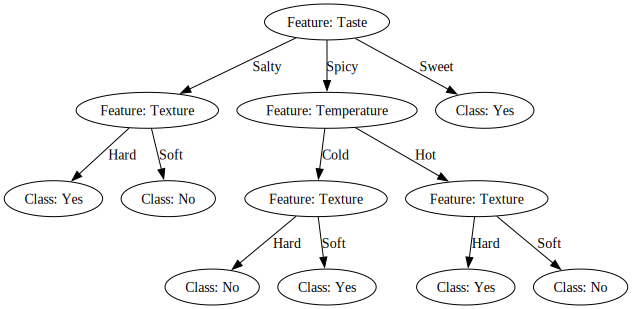

In [8]:
classifier.show_tree()

# Pruning
* Trees always tends to overfit
* A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction
* Prepruning & Postpruning
  - Prepruning : Don't allow tree to grow beyond this point (`min_leaf_size`, `max_depth`, `min_impurity_decrease`)
  - Postpruning : Allows tree to grow as much as possible, then prune the tree (`ccp_alpha`)

## The cost-complexity prunning
Cost-complexity measure:
$$
R_\alpha(T)=R(T)+\alpha∣T∣
$$

where:
* $R(T)$ - The misclassification error (or impurity) of the tree T on the training data.
* $|T∣$ - The number of terminal nodes (leaves) in the tree TT, representing its complexity.
* $\alpha$ - A tuning parameter that controls the trade-off between the tree's accuracy and complexity.

The we want to minimize the $R_\alpha$ over the space of subtrees of given tree T. 

> BWT, what kind of tree we will get if set $\alpha$ to $0, \infty$?

Greedy algorithm:
1. Build the full tree
2. For each node $t$ compute $R_\alpha(T_t)$ of corresponding subtree $T_t$ and $R_\alpha(t)$ of subtree collapsed into that node.
3. Prune the branch, if the $R_\alpha(T_t) < R_\alpha(T)$

> Do we need to recaclucate the $R_\alpha$ for non-prunned nodes?

In [ ]:
# implementation?

import copy

def compute_subtree_error(tree: Dict) -> int:
    """Calculate the total misclassification error of a subtree."""
    ...
    return total_error

def compute_subtree_leaves(tree: Dict) -> int:
    """Count the number of leaf nodes in a subtree."""
    ...
    return total_leaves

def collect_pruning_candidates(tree: Dict, candidates: list) -> None:
    """Collect non-leaf nodes with their effective alpha values."""
    ...

def cost_complexity_pruning(tree: Dict, alpha: float) -> Dict:
    """Prune the tree using cost-complexity pruning with parameter alpha."""
    
    return tree

In [ ]:
# Prune the tree with alpha=0.1 (adjust alpha based on your needs)
alpha = 0.1
pruned_tree = cost_complexity_pruning(decision_tree, alpha)

# Visualize the pruned tree in Jupyter Notebook
dot_pruned = visualize_tree(pruned_tree, feature_names)
display(dot_pruned)  # Display directly in the notebook

# Test prediction with the pruned tree
pruned_prediction = predict(pruned_tree, feature_names, new_data_point)
print(f"Pruned tree prediction: {pruned_prediction}")

### Bonus task 23: Better DT (<1 week deadline!)
Re-Implement the **ID3 algorithm** in the scikit-learn compatible maner. The most convenient implementation (for my taste) will be used for following classes, so you should be ready for 5-10 minute talk about your implementation.

### Bonus Task 24: Prunning
Select any kind of prunning algorithms except for Cost-Complexity Prunnig (e.g. from [here](http://dspace.mit.edu/bitstream/handle/1721.1/6453/AIM-930.pdf?sequence=2)) and implement it.

